Nama: Eka Nur Rahmawati</br>
Bootcamp: DS 35</br>
Final Project Data Analyst : Customer Segementation (RFM) - ABC Harmonia Sound Sales Analysis 2022-2023</br>

# Import Library

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

detail kolom</br>
1. Date	= Tanggal transaksi atau penjualan dilakukan. Bisa digunakan untuk analisis tren waktu.
2. Country = Negara tempat transaksi terjadi. Penting untuk segmentasi geografis.
3. Product Category = Kategori produk (misalnya: Violen, Drum set, etc).
4. Units Sold = Jumlah unit produk yang terjual dalam satu transaksi.
5. Unit Price =	Harga per unit produk. Digunakan untuk menghitung total penjualan.
6. Sales =	Pendapatan setelah diskon: Gross Sales - Discounts.
7. Cost of Goods Sold (COGS) = Biaya produksi atau pembelian barang yang dijual. Digunakan untuk analisis margin.
8. Profit =	Selisih antara Total Sales dan Cost of Goods Sold.
10. Discount Band =	Kategori diskon yang diberikan (misalnya: Low, Medium, High, Promo Only).
11. Segment = Segmentasi pasar (misalnya: Consumer, Corporate, Home Office).
12. Manufacturing Price  = Biaya Produksi
13. Sale Price = Harga jual per unit sebelum diskon.
14. Month Number = Nomor bulan dari transaksi (1–12). Berguna untuk agregasi bulanan.
15. Month Name = Nama bulan dari transaksi (January–December).
16. Year = Tahun transaksi. Cocok untuk analisis tahunan dan perbandingan antar tahun.
16. Discounts = Discount yang diberikan 

In [207]:
df = pd.read_excel(r'D:\belajar\dataScience&analyst\dibimbing\FP_DSA35\Financial_Sample.xlsx')


In [208]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,UAE,Drum set,NaN,3612,130,180,650160,32508.0000,617652.0000,370591.2000,247060.8000,2023-01-01,1,January,2023
1,Government,Germany,Drum set,NaN,452,130,180,81360,4068.0000,77292.0000,46375.2000,30916.8000,2023-01-01,1,January,2023
2,Midmarket,Italy,Drum set,NaN,3069,130,180,552420,11048.4000,541371.6000,324822.9600,216548.6400,2023-06-01,6,June,2023
3,Midmarket,Germany,Drum set,NaN,3066,130,180,551880,11037.6000,540842.4000,324505.4400,216336.9600,2023-06-01,6,June,2023
4,Midmarket,United Kingdom,Drum set,NaN,2274,130,180,409320,8186.4000,401133.6000,240680.1600,160453.4400,2023-06-01,6,June,2023


# Data Frame Information

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        647 non-null    object        
 4   Units Sold           700 non-null    int64         
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    int64         
 8   Discounts            700 non-null    float64       
 9   Sales                700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

total data 700 rows dengan kolom sebanyak 16, ada 3 format datatype yaitu datetime, float, int dan objects

# check missing value

In [210]:
df.isnull().sum()

Segment                 0
Country                 0
Product                 0
Discount Band          53
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts               0
Sales                   0
COGS                    0
Profit                  0
Date                    0
Month Number            0
Month Name              0
Year                    0
dtype: int64

ada missing value pada discount band

In [211]:
df['Discount Band'].unique()

array([nan, 'Low', 'Medium', 'High'], dtype=object)

In [212]:
df['Discount Band'].value_counts()

Discount Band
High      245
Medium    242
Low       160
Name: count, dtype: int64

In [213]:
df[df['Discount Band'].isnull()]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,UAE,Drum set,NaN,3612,130,180,650160,32508.0000,617652.0000,370591.2000,247060.8000,2023-01-01,1,January,2023
1,Government,Germany,Drum set,NaN,452,130,180,81360,4068.0000,77292.0000,46375.2000,30916.8000,2023-01-01,1,January,2023
2,Midmarket,Italy,Drum set,NaN,3069,130,180,552420,11048.4000,541371.6000,324822.9600,216548.6400,2023-06-01,6,June,2023
3,Midmarket,Germany,Drum set,NaN,3066,130,180,551880,11037.6000,540842.4000,324505.4400,216336.9600,2023-06-01,6,June,2023
4,Midmarket,United Kingdom,Drum set,NaN,2274,130,180,409320,8186.4000,401133.6000,240680.1600,160453.4400,2023-06-01,6,June,2023
5,Government,Germany,Drum set,NaN,505,130,180,90900,4545.0000,86355.0000,51813.0000,34542.0000,2023-12-01,12,December,2023
6,Midmarket,Germany,Violin,NaN,3524,150,200,704800,14096.0000,690704.0000,414422.4000,276281.6000,2023-03-01,3,March,2023
7,Channel Partners,UAE,Violin,NaN,2073,150,200,414600,10365.0000,404235.0000,242541.0000,161694.0000,2023-06-01,6,June,2023
8,Government,Italy,Violin,NaN,2108,150,200,421600,21080.0000,400520.0000,240312.0000,160208.0000,2023-06-01,6,June,2023
9,Channel Partners,Germany,Violin,NaN,3177,150,200,635400,15885.0000,619515.0000,371709.0000,247806.0000,2023-06-01,6,June,2023


In [214]:
#nilai yang hilang
df['Discount Band'].isnull().sum()

np.int64(53)

untuk discount band bernilai Nan akan direplace menjadi Promo Only

In [215]:
# Pastikan kolom bertipe kategori
df["Discount Band"] = df["Discount Band"].astype("category")

In [216]:
# Tambahkan label baru
df["Discount Band"] = df["Discount Band"].cat.add_categories(["Promo Only"])

In [217]:
df["Discount Band"].unique()

[NaN, 'Low', 'Medium', 'High']
Categories (4, object): ['High', 'Low', 'Medium', 'Promo Only']

In [218]:
# Ganti NaN dengan label tersebut
df["Discount Band"] = df["Discount Band"].fillna("Promo Only")
# Simpan kembali ke file (overwrite)
# Simpan kembali ke file Excel
df.to_excel("data.xlsx", index=False)

In [219]:
print(df[df["Discount Band"] == "Promo Only"])

             Segment         Country      Product Discount Band  Units Sold  \
0         Government             UAE     Drum set    Promo Only        3612   
1         Government         Germany     Drum set    Promo Only         452   
2          Midmarket           Italy     Drum set    Promo Only        3069   
3          Midmarket         Germany     Drum set    Promo Only        3066   
4          Midmarket  United Kingdom     Drum set    Promo Only        2274   
5         Government         Germany     Drum set    Promo Only         505   
6          Midmarket         Germany       Violin    Promo Only        3524   
7   Channel Partners             UAE       Violin    Promo Only        2073   
8         Government           Italy       Violin    Promo Only        2108   
9   Channel Partners         Germany       Violin    Promo Only        3177   
10         Midmarket  United Kingdom       Violin    Promo Only        1754   
11        Enterprise             UAE       Violin   

In [220]:
df["Discount Band"].value_counts()

Discount Band
High          245
Medium        242
Low           160
Promo Only     53
Name: count, dtype: int64

alasan mengganti NaN menjadi Promo Only:
1. menghindari kehilangan data pada analisis kategorikal
- Nilai NaN sering diabaikan dalam agregasi, visualisasi, atau filter.
- Dengan mengganti NaN menjadi "Promo Only", kita tetap bisa menyertakan baris tersebut dalam analisis segmentasi, profitabilitas, dan distribusi.
2. Interpretasi bisnis: transaksi tanpa diskon eksplisit
"Promo Only" bisa merepresentasikan transaksi yang:
- Tidak masuk dalam skema diskon standar (Low/Medium/High).
- Mungkin menggunakan promosi khusus (bundling, cashback, seasonal promo).
- Atau data diskonnya hilang tapi transaksinya tetap valid.
3. Membuka peluang insight baru
- Apakah transaksi tanpa diskon eksplisit justru lebih profitable?
- Apakah segmen tertentu lebih sering muncul di "Promo Only"?
- Apakah negara tertentu punya pola diskon yang tidak tercatat?

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    category      
 4   Units Sold           700 non-null    int64         
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    int64         
 8   Discounts            700 non-null    float64       
 9   Sales                700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [222]:
df.isna().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

# Check Duplicate

In [223]:
df.duplicated().sum()

np.int64(0)

# Check Outlier Kolom Numerik

In [224]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

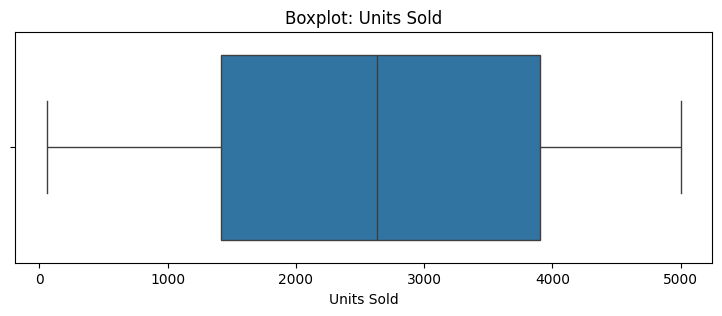

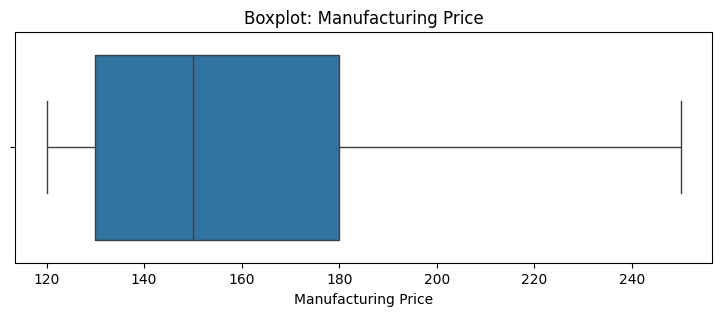

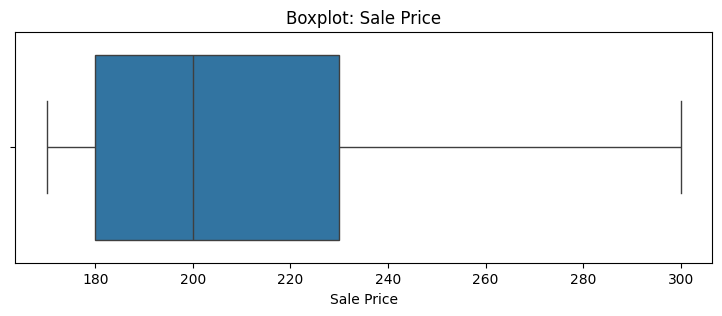

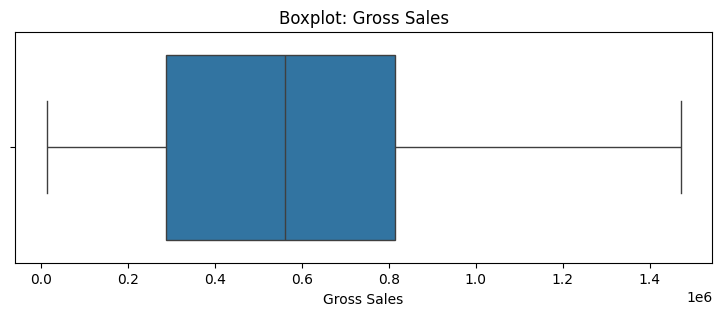

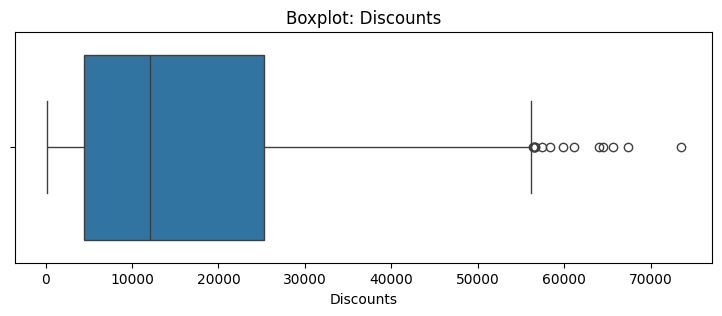

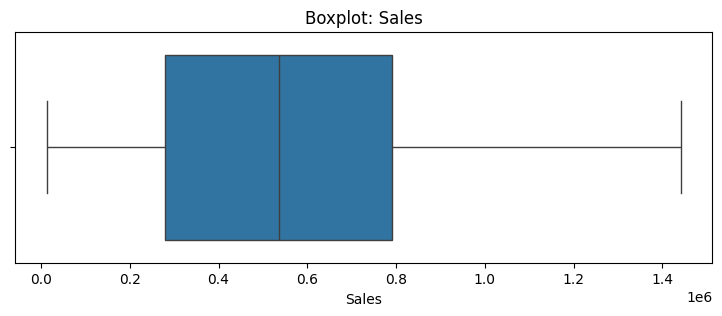

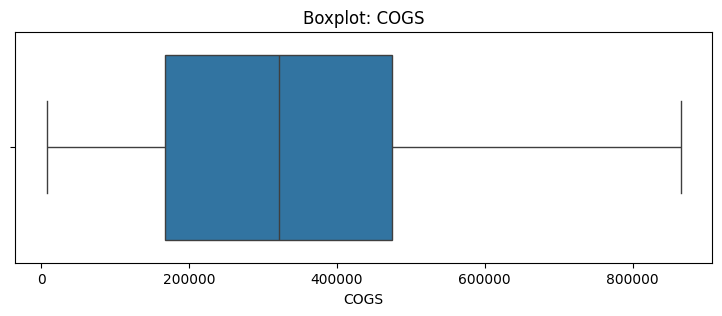

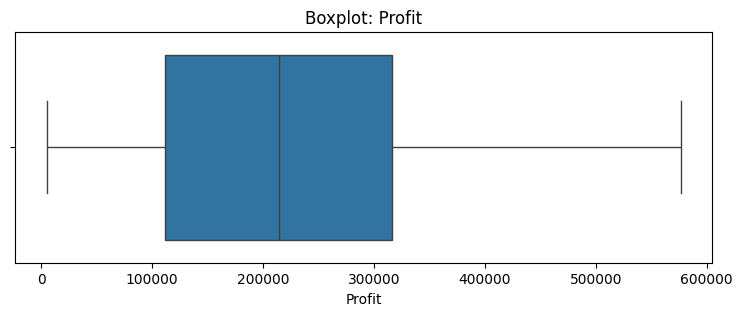

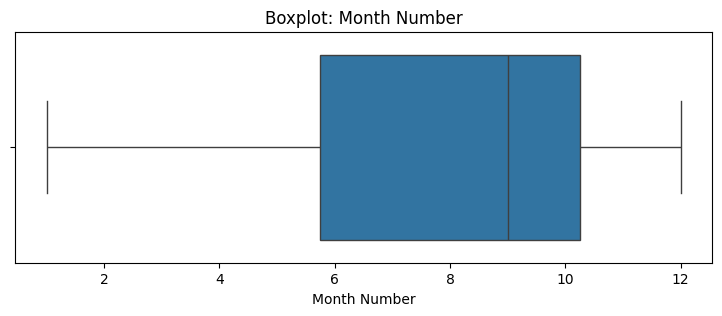

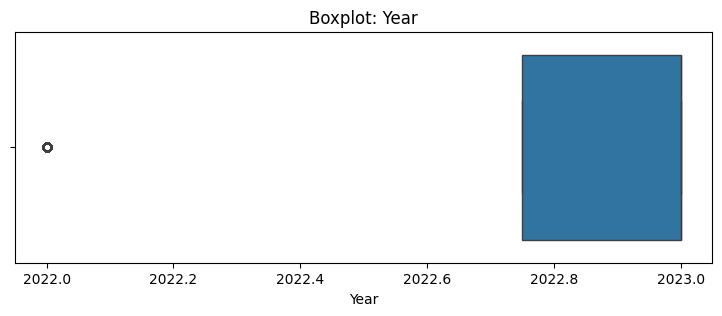

In [225]:
for col in numerical_cols:
    plt.figure(figsize=(9, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

# Matriks Analisis

## 1. Profitibilitas per segment

In [226]:
#Rata-rata dan total Profit
profit_by_segment = df.groupby("Segment")["Profit"].agg(["sum", "mean", "count"]).sort_values("sum", ascending=False)
print("Profitabilitas per Segmen:\n", profit_by_segment)


Profitabilitas per Segmen:
                            sum        mean  count
Segment                                          
Government       64440992.8000 214803.3093    300
Channel Partners 23337529.8000 233375.2980    100
Enterprise       22909772.1600 229097.7216    100
Small Business   21606448.8800 216064.4888    100
Midmarket        20318469.3600 203184.6936    100


C:\Users\Eka Nur Rahmawati\AppData\Local\Temp\ipykernel_16200\4197618756.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Segment", y="Profit", estimator=sum, ci=None)


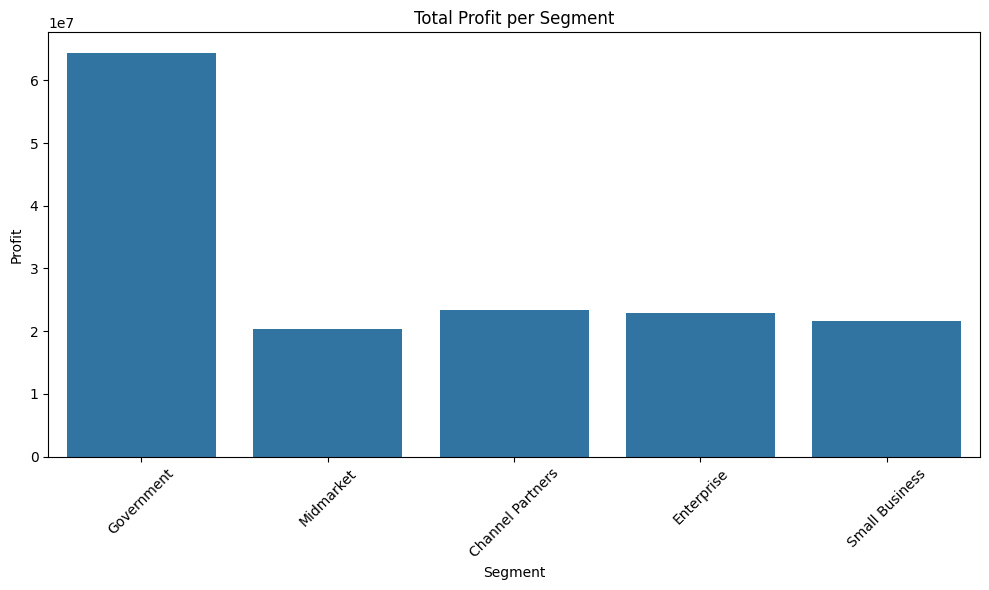

In [227]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Segment", y="Profit", estimator=sum, ci=None)
plt.title("Total Profit per Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"d:\belajar\dataScience&analyst\dibimbing\FP_DSA35\profit_per_segment.png")
plt.show()
plt.close()


In [228]:
df["Margin %"] = (df["Sales"] - df["COGS"]) / df["Sales"] * 100

profit_segment = df.groupby("Segment").agg({
    "Profit": ["sum", "mean", "count"],
    "Sales": "sum",
    "COGS": "sum",
    "Margin %": "mean"
}).sort_values(("Profit", "sum"), ascending=False)

print(profit_segment)


                        Profit                            Sales          COGS  \
                           sum        mean count            sum           sum   
Segment                                                                         
Government       64440992.8000 214803.3093   300 161102482.0000 96661489.2000   
Channel Partners 23337529.8000 233375.2980   100  58343824.5000 35006294.7000   
Enterprise       22909772.1600 229097.7216   100  57274430.4000 34364658.2400   
Small Business   21606448.8800 216064.4888   100  54016122.2000 32409673.3200   
Midmarket        20318469.3600 203184.6936   100  50796173.4000 30477704.0400   

                 Margin %  
                     mean  
Segment                    
Government        40.0000  
Channel Partners  40.0000  
Enterprise        40.0000  
Small Business    40.0000  
Midmarket         40.0000  


Channel Partners-> Menyumbang profit total tertinggi. Volume transaksi besar, tapi margin perlu diaudit.
Enterprise	-> Margin cukup tinggi dan volume besar. Cocok untuk strategi loyalitas dan upsell.
Midmarket  -> Rata-rata profit per transaksi cukup stabil. Segmen ini efisien dan scalable.
Government -> Volume tinggi tapi margin cenderung lebih rendah. Perlu evaluasi diskon dan COGS
Small Business -> Profit total rendah, tapi margin bisa tinggi. Cocok untuk strategi niche dan efisiensi.

yang Perlu di Audit
1. Profit per Transaksi Lebih Rendah
Rata-rata profit per transaksi di segmen Government: 214,803.31
Bandingkan dengan Channel Partners: 233,375.30 Artinya, meskipun total profit tinggi, efisiensi per transaksi lebih rendah.
2. Volume Transaksi Tinggi
Jumlah transaksi di segmen Government: 300
Segmen lain hanya 100 transaksi. Jadi total profit tinggi bisa berasal dari kuantitas, bukan kualitas margin.
3. Margin % Seragam
Semua segmen punya margin 40%, yang menunjukkan struktur harga dan COGS sangat mirip.

Ini bisa jadi indikasi bahwa dataset menggunakan markup tetap atau data simulasi.

Segmen Government memang menyumbang profit terbesar secara total, tapi bukan berarti paling efisien. Channel Partners dan Enterprise punya profit per transaksi lebih tinggi, yang bisa jadi lebih menguntungkan dalam jangka panjang.

Action:</br>
Volume tinggi di Government =	Audit efisiensi operasional dan strategi diskon di segmen ini.</br>
Margin seragam di semua segmen =	Evaluasi struktur harga dan biaya produksi. Cek apakah realistis.</br>
Profit per transaksi lebih tinggi di Channel Partners =	Fokus pada retensi dan loyalitas di segmen ini.</br>

In [229]:
# Cek distribusi harga dan biaya
print(df[["Segment", "Sale Price", "COGS", "Discounts"]].drop_duplicates())

# Hitung ulang margin dengan mempertimbangkan diskon
df["Gross Margin %"] = (df["Gross Sales"] - df["COGS"]) / df["Gross Sales"] * 100
df["Net Margin %"] = (df["Sales"] - df["COGS"]) / df["Sales"] * 100

# Bandingkan margin antar segmen
print(df.groupby("Segment")[["Gross Margin %", "Net Margin %"]].mean())


              Segment  Sale Price        COGS  Discounts
0          Government         180 370591.2000 32508.0000
1          Government         180  46375.2000  4068.0000
2           Midmarket         180 324822.9600 11048.4000
3           Midmarket         180 324505.4400 11037.6000
4           Midmarket         180 240680.1600  8186.4000
..                ...         ...         ...        ...
695    Small Business         190 181034.2800  1516.2000
696    Small Business         190 488089.2900  4087.8500
697        Government         200 378822.0000 33230.0000
698        Government         230 644356.5000 56522.5000
699  Channel Partners         300 342400.5000 14632.5000

[699 rows x 4 columns]
                  Gross Margin %  Net Margin %
Segment                                       
Channel Partners         41.5000       40.0000
Enterprise               40.6000       40.0000
Government               43.0000       40.0000
Midmarket                41.2000       40.0000
Small Busi

## 2. Efektifitas diskon

In [230]:
discount_effectiveness = df.groupby("Discount Band")[["Sales", "COGS", "Profit"]].mean().sort_values("Profit", ascending=False)
print("Efektivitas Diskon:\n", discount_effectiveness)

Efektivitas Diskon:
                     Sales        COGS      Profit
Discount Band                                    
High          570125.2290 342075.1374 228050.0916
Low           569684.5600 341810.7360 227873.8240
Promo Only    562795.6877 337677.4126 225118.2751
Medium        499482.0262 299689.2157 199792.8105


C:\Users\Eka Nur Rahmawati\AppData\Local\Temp\ipykernel_16200\2263123261.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_effectiveness = df.groupby("Discount Band")[["Sales", "COGS", "Profit"]].mean().sort_values("Profit", ascending=False)


C:\Users\Eka Nur Rahmawati\AppData\Local\Temp\ipykernel_16200\12257030.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Discount Band", y="Profit", estimator=sum, ci=None)


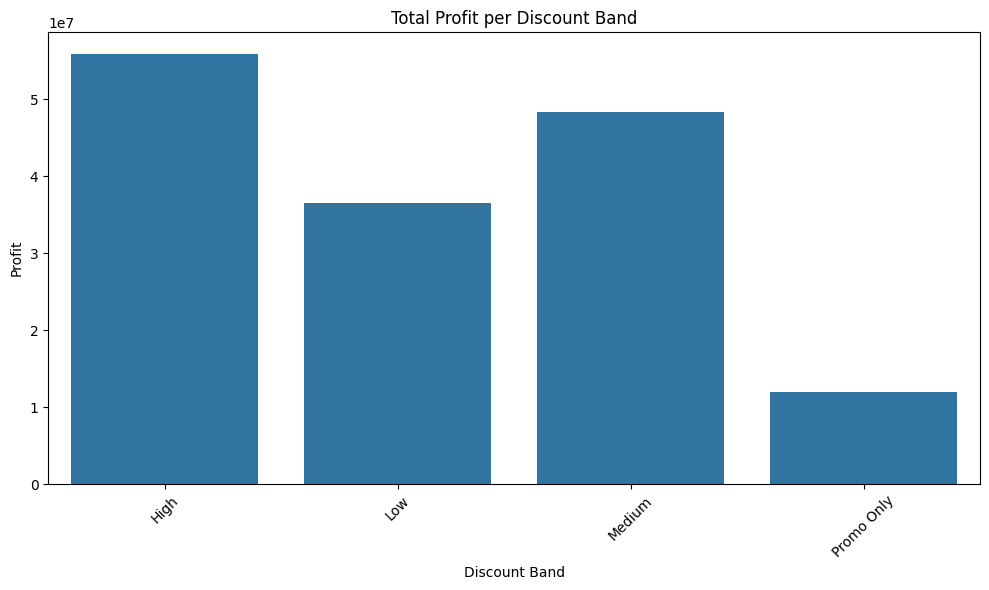

In [231]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Discount Band", y="Profit", estimator=sum, ci=None)
plt.title("Total Profit per Discount Band")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"d:\belajar\dataScience&analyst\dibimbing\FP_DSA35\profit_per_discount_band.png")
plt.show()
plt.close()

Apakah diskon benar-benar meningkatkan profitabilitas? Apakah diskon tinggi justru merusak margin? Apakah segmen tertentu lebih sensitif terhadap diskon?

Dimensi Analisis	Penjelasan
Profit & Margin	-> Apakah diskon meningkatkan profit atau justru menurunkan margin?
Volume Penjualan -> Apakah diskon mendorong lebih banyak transaksi atau unit terjual?
Segment Responsiveness	-> Apakah segmen tertentu lebih responsif terhadap diskon?
Promo Only vs Diskon -> 	Apakah transaksi tanpa diskon eksplisit lebih efisien?

In [232]:
# Isi NaN dengan 'Promo Only'
df["Discount Band"] = df["Discount Band"].fillna("Promo Only")

# Hitung margin
df["Margin %"] = (df["Sales"] - df["COGS"]) / df["Sales"] * 100
diskon_perf = df.groupby("Discount Band").agg({
    "Profit": ["sum", "mean"],
    "Sales": "sum",
    "Units Sold": "sum",
    "Margin %": "mean",
    "Product": "count"
}).sort_values(("Profit", "sum"), ascending=False)

print("Efektivitas Diskon:\n", diskon_perf)


Efektivitas Diskon:
                      Profit                      Sales Units Sold Margin %  \
                        sum        mean            sum        sum     mean   
Discount Band                                                                
High          55872272.4400 228050.0916 139680681.1000     673256  40.0000   
Medium        48349860.1400 199792.8105 120874650.3500     586649  40.0000   
Low           36459811.8400 227873.8240  91149529.6000     425653  40.0000   
Promo Only    11931268.5800 225118.2751  29828171.4500     144423  40.0000   

              Product  
                count  
Discount Band          
High              245  
Medium            242  
Low               160  
Promo Only         53  


C:\Users\Eka Nur Rahmawati\AppData\Local\Temp\ipykernel_16200\3148468013.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diskon_perf = df.groupby("Discount Band").agg({


C:\Users\Eka Nur Rahmawati\AppData\Local\Temp\ipykernel_16200\3845535384.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Discount Band", y="Margin %", estimator="mean", palette="Purples")


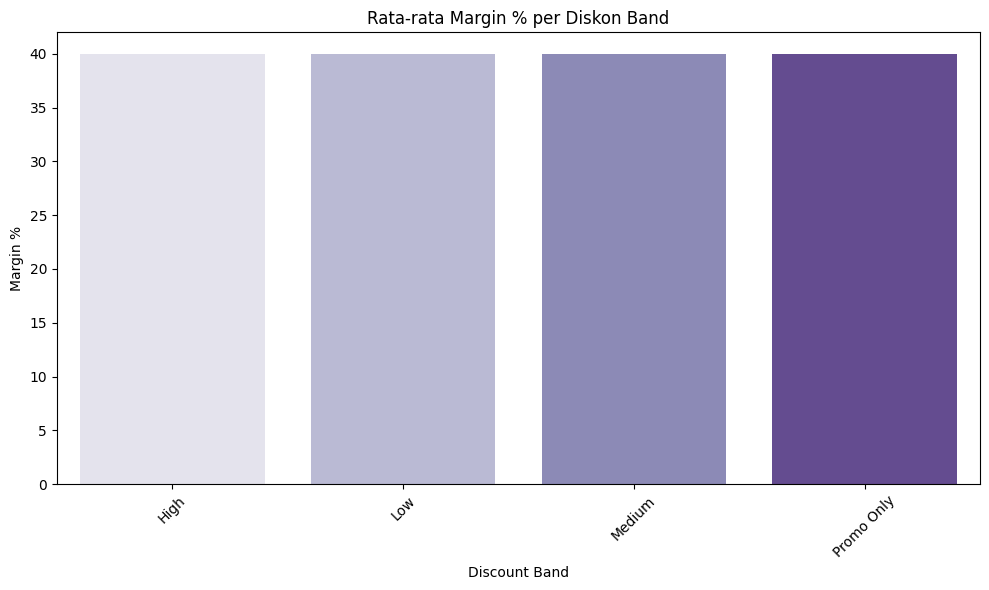

In [233]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Discount Band", y="Margin %", estimator="mean", palette="Purples")
plt.title("Rata-rata Margin % per Diskon Band")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Eka Nur Rahmawati\AppData\Local\Temp\ipykernel_16200\3959258590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Discount Band", y="Units Sold", estimator="sum", palette="Blues")


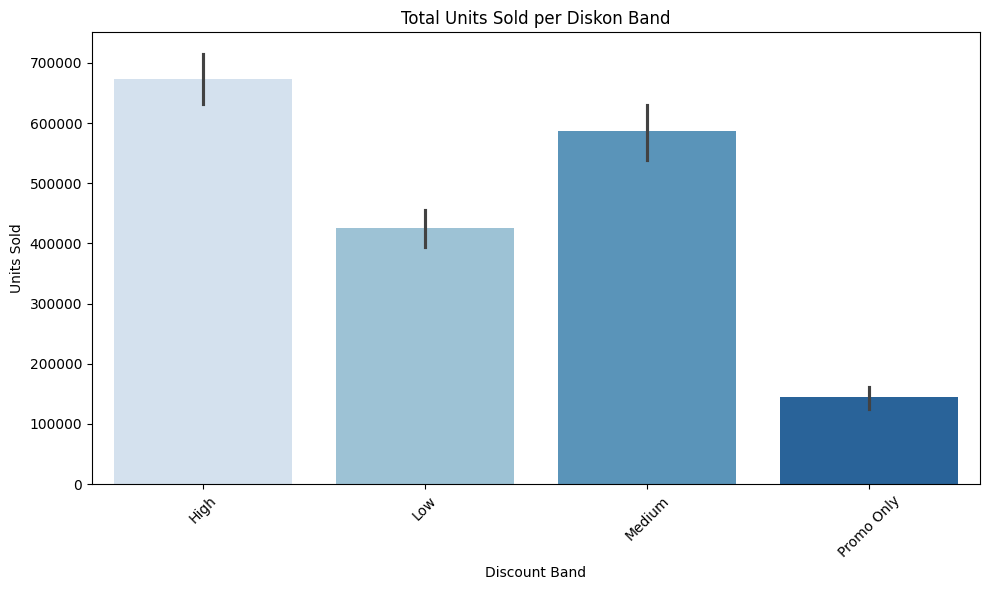

In [234]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Discount Band", y="Units Sold", estimator="sum", palette="Blues")
plt.title("Total Units Sold per Diskon Band")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [235]:
#Filter Data Promo Only vs High Diskon
promo_df = df[df["Discount Band"] == "Promo Only"]
high_df = df[df["Discount Band"] == "High"]


C:\Users\Eka Nur Rahmawati\AppData\Local\Temp\ipykernel_16200\2794318136.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_profit.index, y=promo_profit.values, palette="Blues")


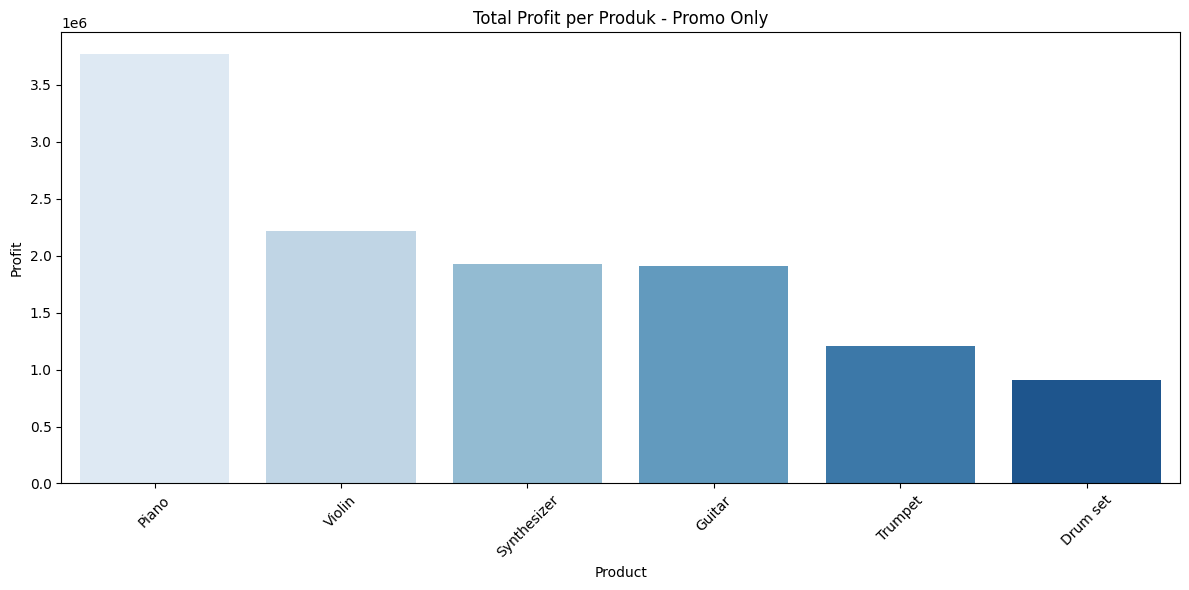

C:\Users\Eka Nur Rahmawati\AppData\Local\Temp\ipykernel_16200\2794318136.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_profit.index, y=high_profit.values, palette="Reds")


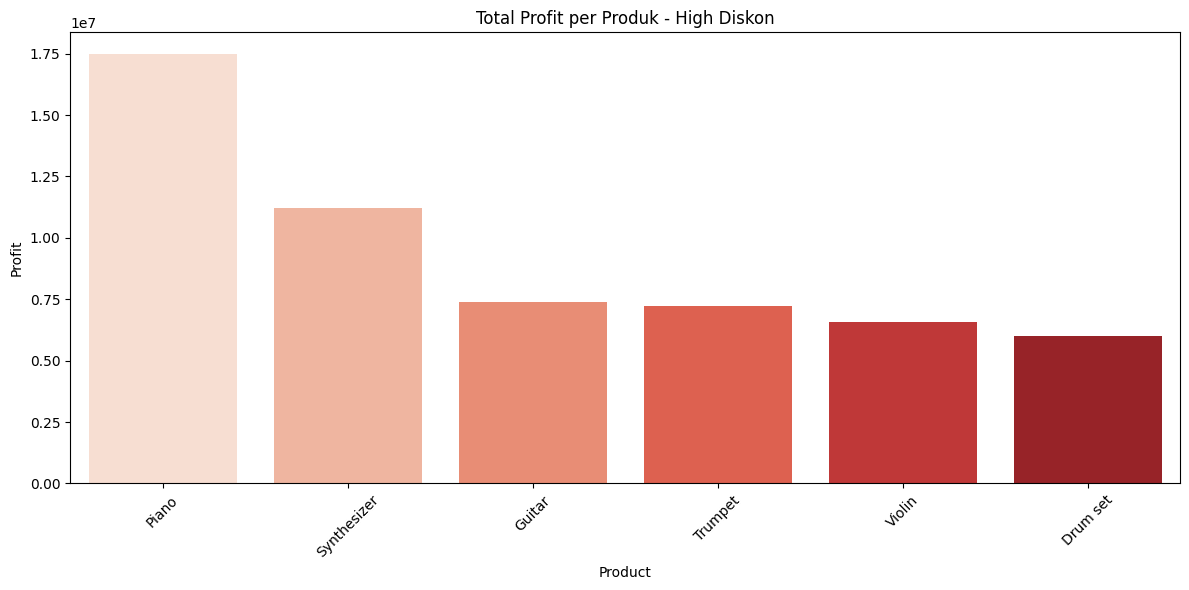

In [236]:
#Audit Profit per Produk
# Promo Only
promo_profit = promo_df.groupby("Product")["Profit"].sum().sort_values(ascending=False)

# High Diskon
high_profit = high_df.groupby("Product")["Profit"].sum().sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(12,6))
sns.barplot(x=promo_profit.index, y=promo_profit.values, palette="Blues")
plt.title("Total Profit per Produk - Promo Only")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=high_profit.index, y=high_profit.values, palette="Reds")
plt.title("Total Profit per Produk - High Diskon")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Eka Nur Rahmawati\AppData\Local\Temp\ipykernel_16200\3405399608.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_margin.index, y=promo_margin.values, palette="Greens")


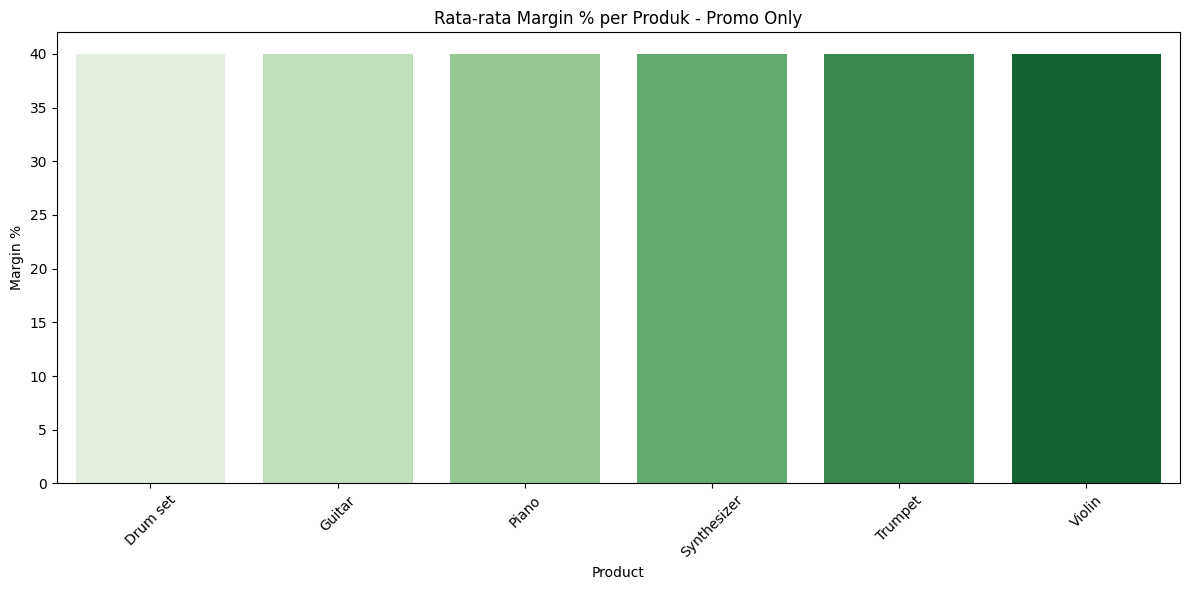

C:\Users\Eka Nur Rahmawati\AppData\Local\Temp\ipykernel_16200\3405399608.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_margin.index, y=high_margin.values, palette="Purples")


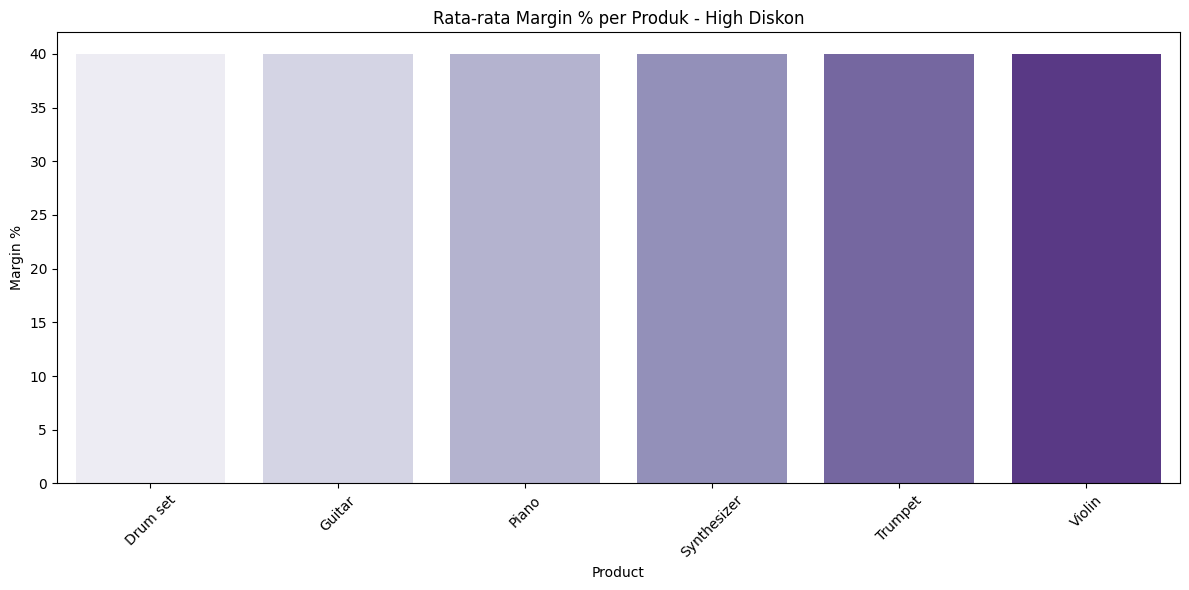

In [237]:
#Audit Margin per Produk
# Promo Only
promo_margin = promo_df.groupby("Product")["Margin %"].mean().sort_values(ascending=False)

# High Diskon
high_margin = high_df.groupby("Product")["Margin %"].mean().sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(12,6))
sns.barplot(x=promo_margin.index, y=promo_margin.values, palette="Greens")
plt.title("Rata-rata Margin % per Produk - Promo Only")
plt.ylabel("Margin %")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=high_margin.index, y=high_margin.values, palette="Purples")
plt.title("Rata-rata Margin % per Produk - High Diskon")
plt.ylabel("Margin %")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [238]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,Margin %,Gross Margin %,Net Margin %
0,Government,UAE,Drum set,Promo Only,3612,130,180,650160,32508.0000,617652.0000,370591.2000,247060.8000,2023-01-01,1,January,2023,40.0000,43.0000,40.0000
1,Government,Germany,Drum set,Promo Only,452,130,180,81360,4068.0000,77292.0000,46375.2000,30916.8000,2023-01-01,1,January,2023,40.0000,43.0000,40.0000
2,Midmarket,Italy,Drum set,Promo Only,3069,130,180,552420,11048.4000,541371.6000,324822.9600,216548.6400,2023-06-01,6,June,2023,40.0000,41.2000,40.0000
3,Midmarket,Germany,Drum set,Promo Only,3066,130,180,551880,11037.6000,540842.4000,324505.4400,216336.9600,2023-06-01,6,June,2023,40.0000,41.2000,40.0000
4,Midmarket,United Kingdom,Drum set,Promo Only,2274,130,180,409320,8186.4000,401133.6000,240680.1600,160453.4400,2023-06-01,6,June,2023,40.0000,41.2000,40.0000


C:\Users\Eka Nur Rahmawati\AppData\Local\Temp\ipykernel_16200\1814021809.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_units.index, y=promo_units.values, palette="coolwarm")


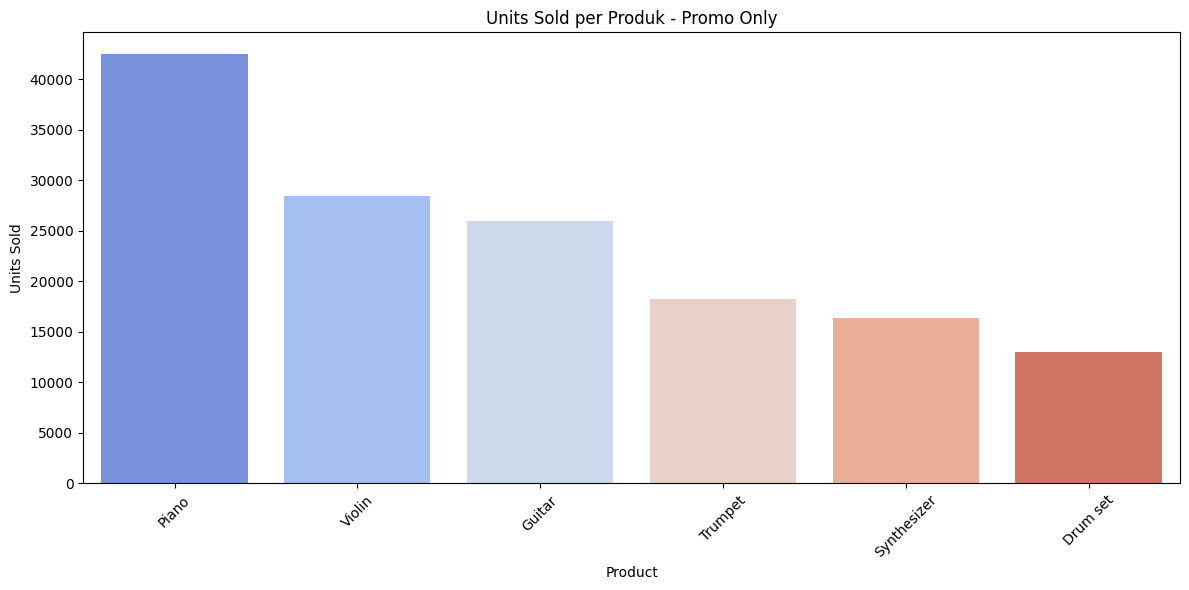

C:\Users\Eka Nur Rahmawati\AppData\Local\Temp\ipykernel_16200\1814021809.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_units.index, y=high_units.values, palette="magma")


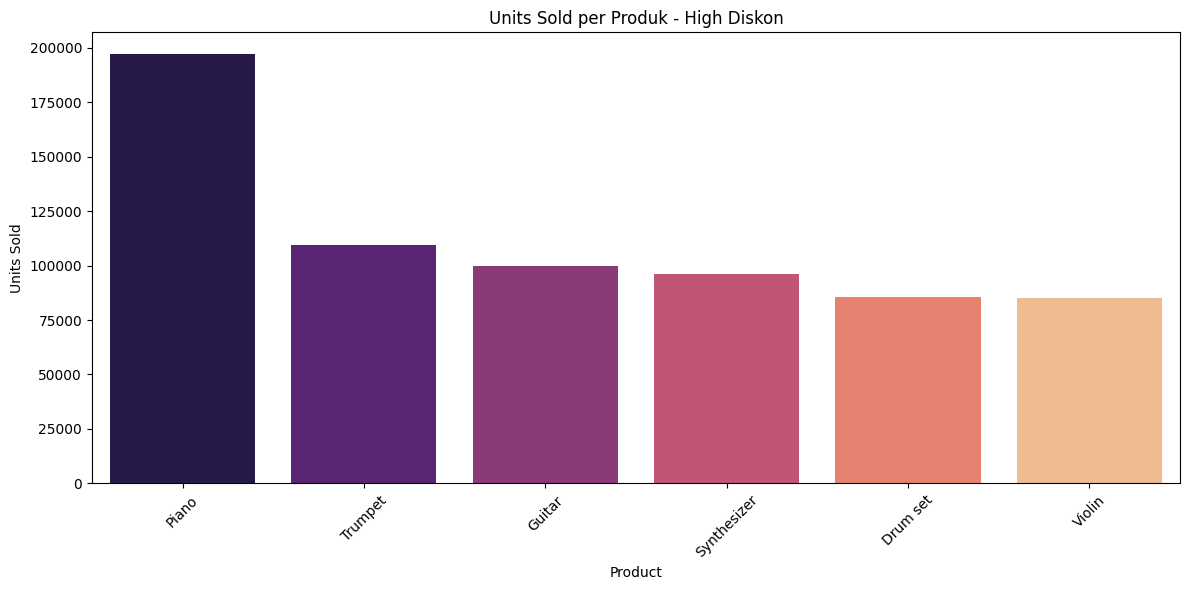

In [239]:
# Promo Only
promo_units = promo_df.groupby("Product")["Units Sold"].sum().sort_values(ascending=False)

# High Diskon
high_units = high_df.groupby("Product")["Units Sold"].sum().sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(12,6))
sns.barplot(x=promo_units.index, y=promo_units.values, palette="coolwarm")
plt.title("Units Sold per Produk - Promo Only")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=high_units.index, y=high_units.values, palette="magma")
plt.title("Units Sold per Produk - High Diskon")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insight dan action
1. Produk di Promo Only punya margin lebih tinggi -> Pertimbangkan promosi non-diskon seperti bundling atau cashback.
2. Produk di High Diskon punya volume tinggi tapi margin rendah -> Audit apakah diskon benar-benar mendorong profitabilitas.
3. Produk tertentu dominan di satu kategori -> Sesuaikan strategi promosi berdasarkan respons produk.

## 3. performa produk

In [240]:
product_performance = df.groupby("Product")[["Units Sold", "Sales", "Profit"]].sum().sort_values("Profit", ascending=False)
print("Performa Produk:\n", product_performance)


Performa Produk:
              Units Sold          Sales        Profit
Product                                             
Piano            527182 117452226.6500 46980890.6600
Synthesizer      275235  80191515.0000 32076606.0000
Violin           248239  48092283.0000 19236913.2000
Trumpet          282048  46512151.3000 18604860.5200
Guitar           246655  45473041.0500 18189216.4200
Drum set         250622  43811815.5000 17524726.2000


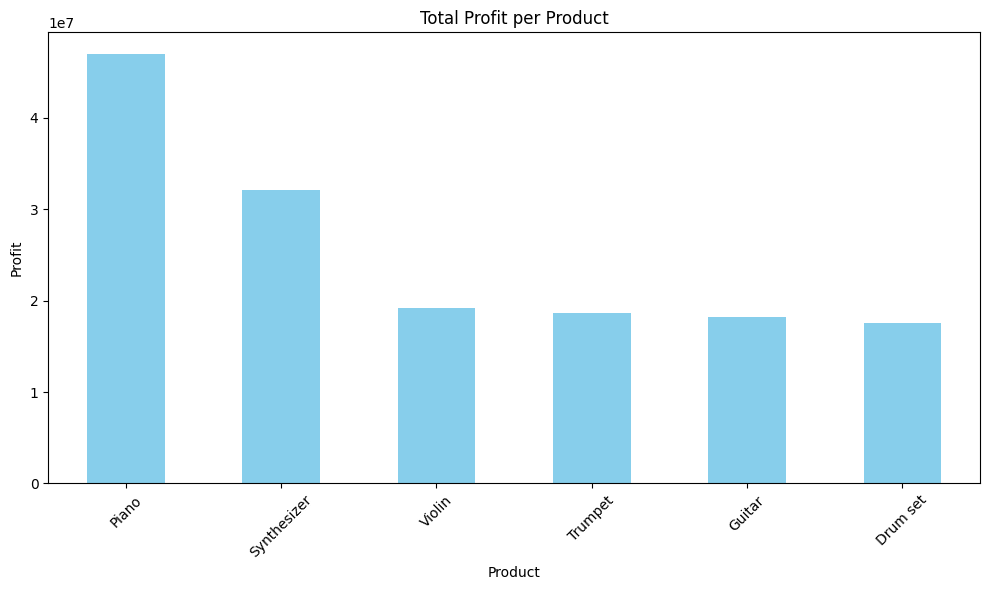

In [241]:
product_profit = df.groupby("Product")["Profit"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
product_profit.plot(kind="bar", color="skyblue")
plt.title("Total Profit per Product")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"d:\belajar\dataScience&analyst\dibimbing\FP_DSA35\profit_per_product.png")
plt.show()
plt.close()

## 4. segmentasi diskon vs profit

In [242]:
segment_discount_matrix = df.pivot_table(values="Profit", index="Segment", columns="Discount Band", aggfunc="mean")
print("Segmentasi Diskon vs Profit:\n", segment_discount_matrix)


Segmentasi Diskon vs Profit:
 Discount Band           High         Low      Medium  Promo Only
Segment                                                         
Channel Partners 258392.2714 255815.8200 179364.6400 251746.5600
Enterprise       221419.5600 259641.3600 197455.2624 219909.3600
Government       235282.7365 196602.0667 205275.5529 216873.9800
Midmarket        218415.2293 213974.5067 183722.4200 182128.9292
Small Business   190539.6394 235811.1858 211513.0205 347297.7850


C:\Users\Eka Nur Rahmawati\AppData\Local\Temp\ipykernel_16200\212508730.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  segment_discount_matrix = df.pivot_table(values="Profit", index="Segment", columns="Discount Band", aggfunc="mean")


C:\Users\Eka Nur Rahmawati\AppData\Local\Temp\ipykernel_16200\700313214.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values="Profit", index="Segment", columns="Discount Band", aggfunc="sum")


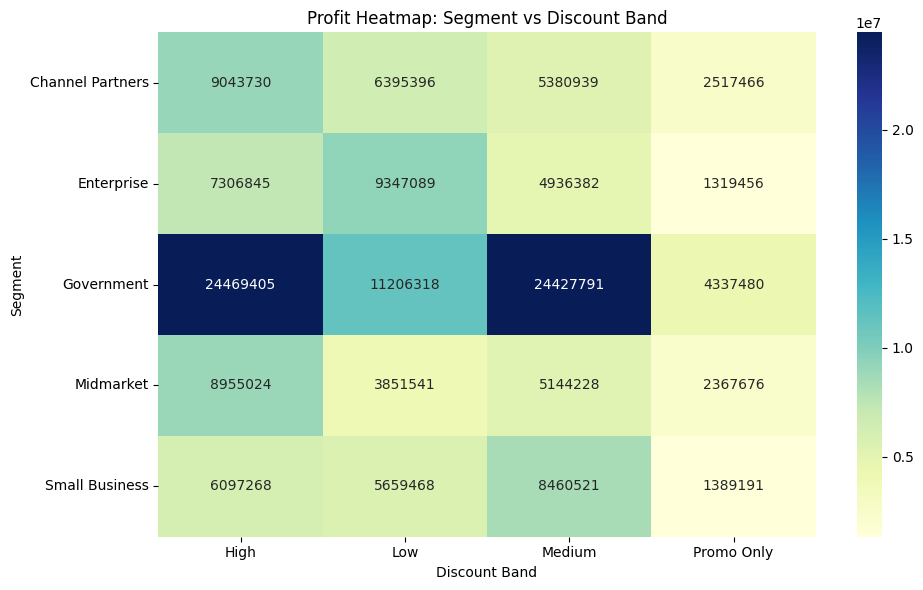

In [243]:
pivot_table = df.pivot_table(values="Profit", index="Segment", columns="Discount Band", aggfunc="sum")
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Profit Heatmap: Segment vs Discount Band")
plt.tight_layout()
plt.savefig(r"d:\belajar\dataScience&analyst\dibimbing\FP_DSA35\heatmap_segment_discount.png")
plt.show()
plt.close()

## 5. Promo only audit

In [244]:
promo_only_audit = df[df["Discount Band"] == "Promo Only"].groupby(["Segment", "Country"])["Profit"].agg(["mean", "count"])
print("Promo Only Audit:\n", promo_only_audit)


Promo Only Audit:
                                        mean  count
Segment          Country                          
Channel Partners Denmark        261021.8000      3
                 Germany        224859.1800      5
                 UAE            305052.1500      2
Enterprise       Denmark        100104.8400      1
                 Germany        371760.8400      1
                 Italy           14137.2000      1
                 UAE            277817.7600      3
Government       Denmark        357718.7000      2
                 Germany        200901.6571      7
                 Italy          154459.5500      4
                 UAE            239712.3600      5
                 United Kingdom 199665.3000      2
Midmarket        Denmark        210415.8000      2
                 Germany        213402.1867      3
                 Italy          162575.4667      3
                 UAE            258308.4000      1
                 United Kingdom 140150.7800      4
Small Busine

C:\Users\Eka Nur Rahmawati\AppData\Local\Temp\ipykernel_16200\2926625367.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=promo_df, x="Segment", order=promo_df["Segment"].value_counts().index, palette="viridis")


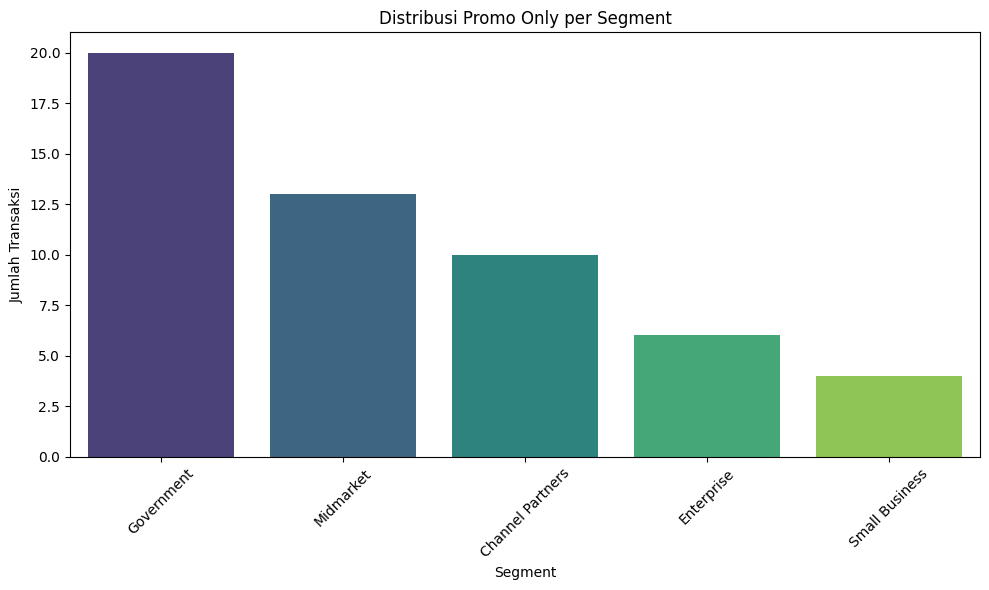

In [245]:
#Distribusi Promo Only per Segment
# Filter Promo Only
promo_df = df[df["Discount Band"] == "Promo Only"]

# Plot distribusi per Segment
plt.figure(figsize=(10,6))
sns.countplot(data=promo_df, x="Segment", order=promo_df["Segment"].value_counts().index, palette="viridis")
plt.title("Distribusi Promo Only per Segment")
plt.xlabel("Segment")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Eka Nur Rahmawati\AppData\Local\Temp\ipykernel_16200\1605285019.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promo_df, x="Segment", y="Profit", estimator="mean", palette="magma")


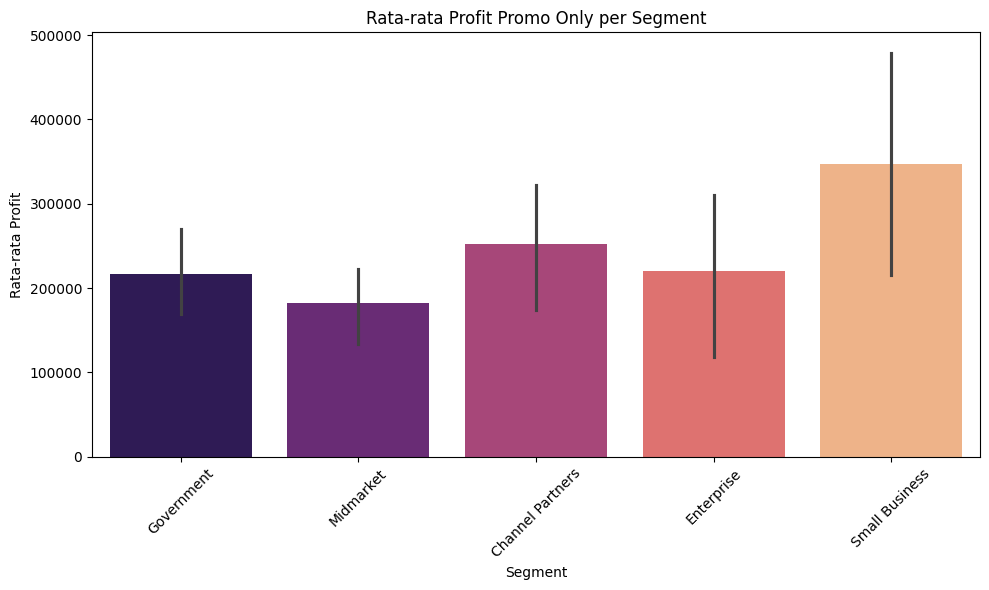

In [246]:
#Rata-rata Profit Promo Only per Segment
plt.figure(figsize=(10,6))
sns.barplot(data=promo_df, x="Segment", y="Profit", estimator="mean", palette="magma")
plt.title("Rata-rata Profit Promo Only per Segment")
plt.xlabel("Segment")
plt.ylabel("Rata-rata Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Eka Nur Rahmawati\AppData\Local\Temp\ipykernel_16200\2137702020.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=promo_df, x="Country", order=promo_df["Country"].value_counts().index, palette="coolwarm")


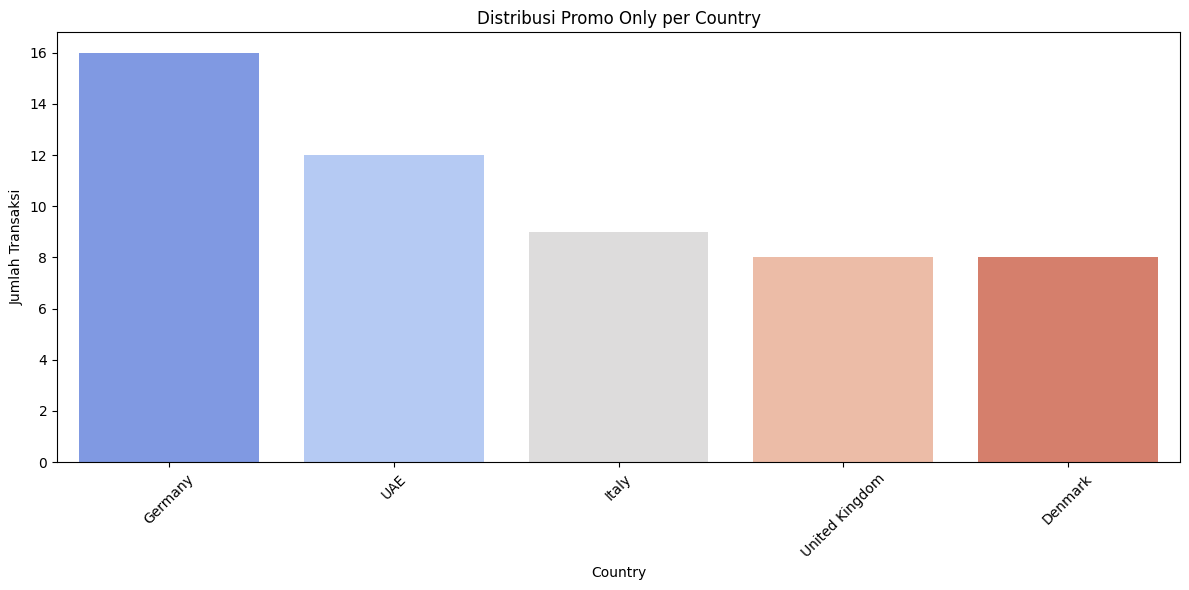

In [247]:
#Distribusi Promo Only per Country
plt.figure(figsize=(12,6))
sns.countplot(data=promo_df, x="Country", order=promo_df["Country"].value_counts().index, palette="coolwarm")
plt.title("Distribusi Promo Only per Country")
plt.xlabel("Country")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insight yang Bisa Didapat:</br>
Segmen seperti Midmarket atau Government mungkin dominan dalam transaksi "Promo Only".</br>

Jika rata-rata profit "Promo Only" tinggi, bisa jadi strategi promosi informal lebih efektif daripada diskon eksplisit.</br>

Negara tertentu mungkin punya pola pencatatan diskon yang tidak konsisten—indikasi untuk audit sistem penjualan.</br>



## 6. Margin per product

In [248]:
df["Margin %"] = (df["Sales"] - df["COGS"]) / df["Sales"] * 100
margin_by_product = df.groupby("Product")["Margin %"].mean().sort_values(ascending=False)
print("Margin per Produk:\n", margin_by_product)


Margin per Produk:
 Product
Drum set      40.0000
Guitar        40.0000
Piano         40.0000
Synthesizer   40.0000
Trumpet       40.0000
Violin        40.0000
Name: Margin %, dtype: float64


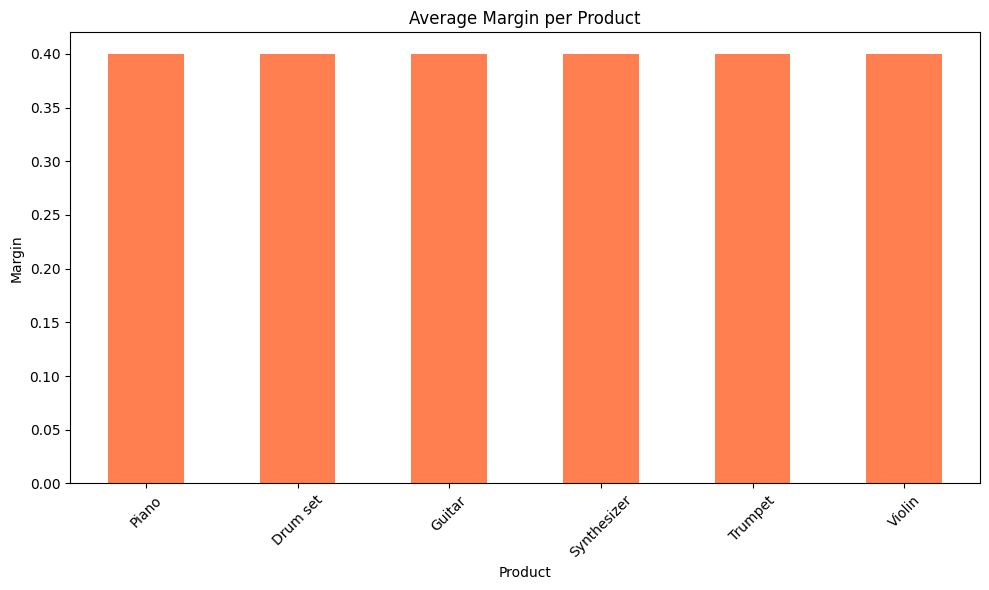

In [249]:
df["Margin"] = (df["Sales"] - df["COGS"]) / df["Sales"]
product_margin = df.groupby("Product")["Margin"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
product_margin.plot(kind="bar", color="coral")
plt.title("Average Margin per Product")
plt.ylabel("Margin")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"d:\belajar\dataScience&analyst\dibimbing\FP_DSA35\margin_per_product.png")
plt.show()
plt.close()


Strategi Loyalitas	Target Segment/Negara	Bentuk Implementasi
Cashback tanpa diskon	->Negara dengan margin tinggi	Reward points, cashback, atau bonus produk
Bundling produk unggulan	-> Produk dominan di Promo Only	Paket hemat tanpa potongan harga eksplisit
Tier loyalitas berbasis volume	->Segmen dengan transaksi tinggi	->Bronze–Silver–Gold-Platinum berdasarkan units sold
Edukasi nilai produk	-> Negara dengan margin rendah	Komunikasi manfaat produk daripada harga

Tier Loyalitas 
Bronze: Units Sold < 100.000
Silver: 100.000 ≤ Units Sold < 250.000
Gold: 250.000 < Units Sold <500.000
platinum: >=500.000 Unit Sold

In [250]:
import pandas as pd

# Load data
df = pd.read_excel("Financial_Sample.xlsx")

# Hitung total Units Sold per Segment
segment_units = df.groupby("Segment")["Units Sold"].sum().reset_index()

# Tentukan tier loyalitas berdasarkan Units Sold
def assign_tier(units):
    if units >= 500000:
        return "Platinum"
    elif units >= 250000:
        return "Gold"
    elif units >= 100000:
        return "Silver"
    else:
        return "Bronze"


segment_units["Loyalty Tier"] = segment_units["Units Sold"].apply(assign_tier)

# Urutkan dari transaksi tertinggi
segment_units = segment_units.sort_values("Units Sold", ascending=False)
# Gabungkan kembali dengan data utama
df = df.merge(segment_units[["Segment", "Loyalty Tier"]], on="Segment", how="left")
print(segment_units)


            Segment  Units Sold Loyalty Tier
2        Government      788668     Platinum
0  Channel Partners      279061         Gold
1        Enterprise      276559         Gold
4    Small Business      244557       Silver
3         Midmarket      241136       Silver


In [251]:
# Asumsikan churn rate berdasarkan loyalitas tier
churn_map = {"Bronze": 0.30, "Silver": 0.20, "Gold": 0.10, "Platinum": 0.05}
reward_map = {"Bronze": 0, "Silver": 5, "Gold": 10, "Platinum": 20}

df["Churn Rate"] = segment_units["Loyalty Tier"].map(churn_map)
df["Reward Cost"] = df["Units Sold"] * segment_units["Loyalty Tier"].map(reward_map)

# Hitung margin dan dampak churn
df["Margin %"] = (df["Sales"] - df["COGS"]) / df["Sales"] * 100
df["Net Profit"] = df["Sales"] - df["COGS"] - df["Reward Cost"]
df["Lost Revenue"] = df["Sales"] * df["Churn Rate"]
df["Adjusted Profit"] = df["Net Profit"] - df["Lost Revenue"]
df["Adjusted Margin %"] = df["Adjusted Profit"] / df["Sales"] * 100


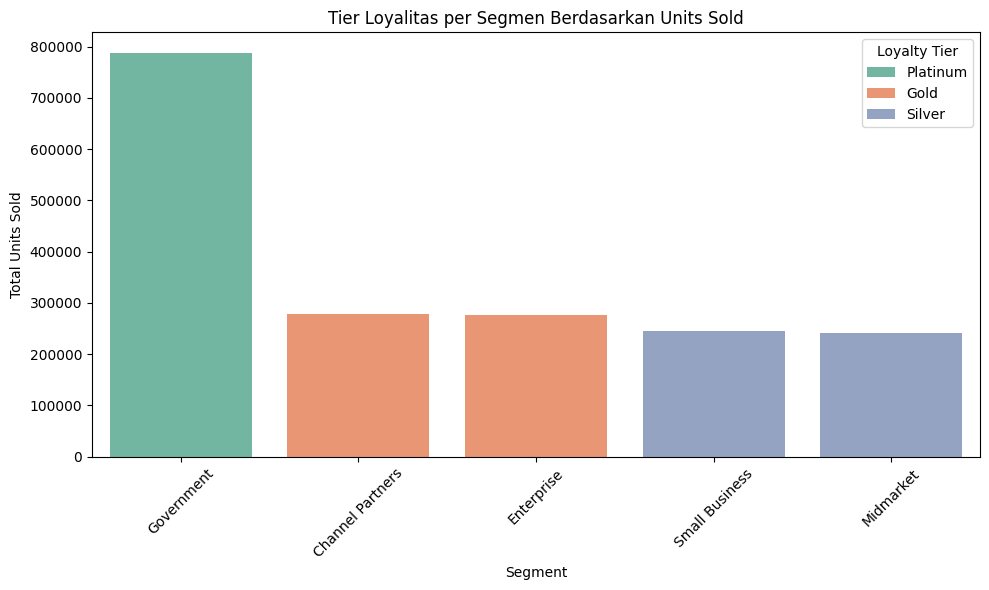

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=segment_units, x="Segment", y="Units Sold", hue="Loyalty Tier", palette="Set2")
plt.title("Tier Loyalitas per Segmen Berdasarkan Units Sold")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Tier	Karakteristik Segmen	Strategi Loyalitas yang Direkomendasikan
Gold	Volume transaksi tinggi, pelanggan aktif	Cashback, early access, bundling eksklusif
Silver	Transaksi stabil, potensial naik kelas	Reward bertahap, referral bonus
Bronze	Transaksi rendah, perlu aktivasi ulang	Welcome bonus, edukasi nilai produk, promo targeted

      Month         Sales        Profit
0   2022-09 20274568.1500  8109827.2600
1   2022-10 39066325.3500 15626530.1400
2   2022-11 17740339.9500  7096135.9800
3   2022-12 19345085.9000  7738034.3600
4   2023-01 20995835.8000  8398334.3200
5   2023-02 18352203.9000  7340881.5600
6   2023-03 14995386.1000  5998154.4400
7   2023-04 23476849.2000  9390739.6800
8   2023-05 17789251.1000  7115700.4400
9   2023-06 40315819.1000 16126327.6400
10  2023-07 17927246.8000  7170898.7200
11  2023-08 19475169.0000  7790067.6000
12  2023-09 18134839.4000  7253935.7600
13  2023-10 38233467.2500 15293386.9000
14  2023-11 18668947.1000  7467578.8400
15  2023-12 36741698.4000 14696679.3600


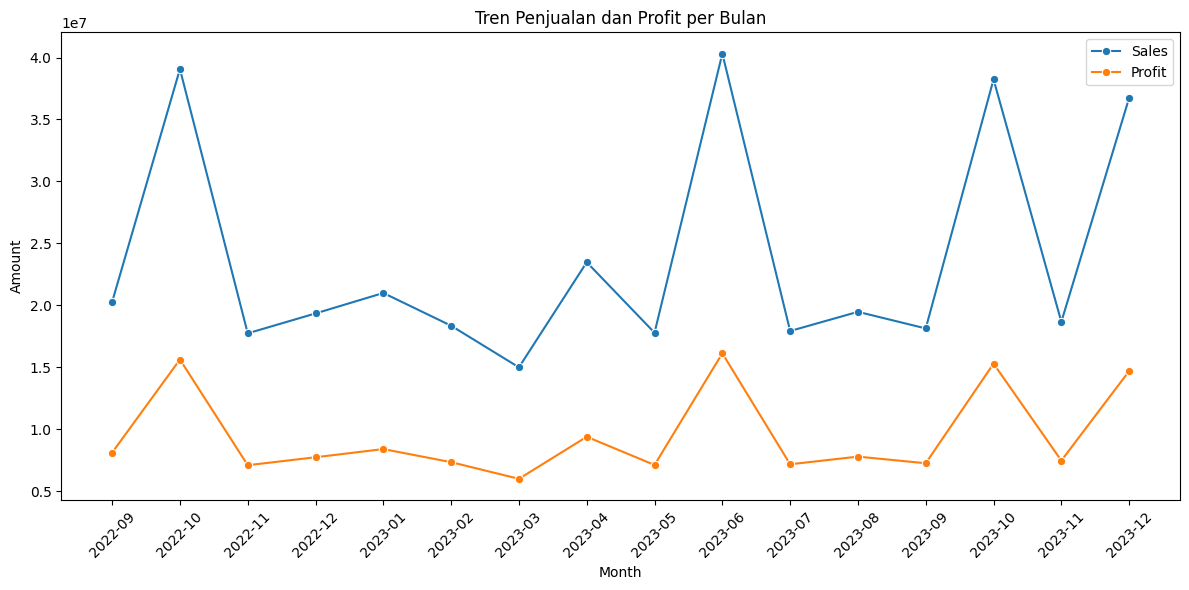

In [253]:
# Pastikan kolom tanggal dalam format datetime
df["Date"] = pd.to_datetime(df["Date"])

# Tambahkan kolom bulan dan tahun
df["Month"] = df["Date"].dt.to_period("M")  # Format YYYY-MM

# Agregasi penjualan dan profit per bulan
monthly_matrix = df.groupby("Month").agg({
    "Sales": "sum",
    "Profit": "sum"
}).reset_index()

# Konversi kembali ke string untuk tampilan
monthly_matrix["Month"] = monthly_matrix["Month"].astype(str)

print(monthly_matrix)


plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_matrix, x="Month", y="Sales", label="Sales", marker="o")
sns.lineplot(data=monthly_matrix, x="Month", y="Profit", label="Profit", marker="o")
plt.title("Tren Penjualan dan Profit per Bulan")
plt.xticks(rotation=45)
plt.ylabel("Amount")
plt.legend()
plt.tight_layout()
plt.show()


In [254]:
df["Month"] = df["Date"].dt.to_period("M").astype(str)

pivot_matrix = pd.pivot_table(df, index="Month", columns="Segment", values="Sales", aggfunc="sum")
print(pivot_matrix)
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()




Segment  Channel Partners   Enterprise    Government    Midmarket  \
Month                                                               
2022-09      3547518.0000 2381435.1000  9440463.5000 1645282.8000   
2022-10      4464447.0000 6065947.8000 14363439.5000 7916538.0000   
2022-11      3087025.5000 2236608.0000  9137537.0000 1590863.4000   
2022-12      1721109.0000 2656397.7000  8193702.5000 2686317.2000   
2023-01      4353570.0000 2902076.1000  7298023.5000 2708249.6000   
2023-02      2346435.0000 1585049.4000  8887022.0000 2794960.0000   
2023-03      1718661.7500 3270455.1000  6023988.0000 1485876.0000   
2023-04      4744496.2500 4079186.1000  8697136.0000 3789846.2000   
2023-05      3962010.0000 3705104.7000  6181583.5000 1996701.0000   
2023-06      6343486.5000 6472748.7000 17382862.5000 5099175.2000   
2023-07      3198029.2500 2422233.0000  8029590.0000 1853405.4000   
2023-08      2094339.0000 1997760.6000  9931319.0000 1929649.4000   
2023-09      2245698.0000 2590978.

In [255]:
monthly_sales = df.groupby('Month')['Sales'].sum().sort_values(ascending=False)
print(monthly_sales)

Month
October     77299792.6000
December    56086784.3000
June        40315819.1000
September   38409407.5500
November    36409287.0500
April       23476849.2000
January     20995835.8000
August      19475169.0000
February    18352203.9000
July        17927246.8000
May         17789251.1000
March       14995386.1000
Name: Sales, dtype: float64


In [256]:
# Pastikan tanggal dalam format datetime
df["Date"] = pd.to_datetime(df["Date"])

# Tambahkan kolom bulan
df["Month"] = df["Date"].dt.to_period("M").astype(str)

# Hitung margin per transaksi
df["Margin %"] = (df["Sales"] - df["COGS"]) / df["Sales"] * 100

# Agregasi margin rata-rata per segmen per bulan
margin_matrix = df.groupby(["Month", "Segment"])["Margin %"].mean().reset_index()

print(margin_matrix.head())

     Month           Segment  Margin %
0  2022-09  Channel Partners   40.0000
1  2022-09        Enterprise   40.0000
2  2022-09        Government   40.0000
3  2022-09         Midmarket   40.0000
4  2022-09    Small Business   40.0000


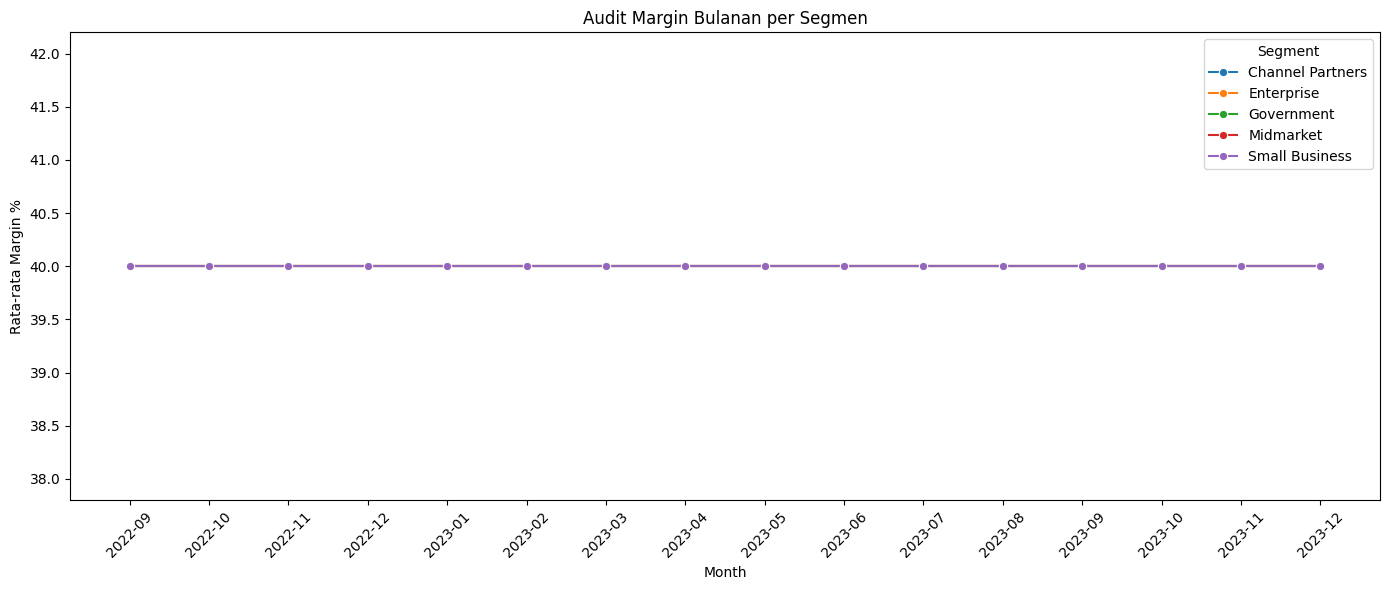

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.lineplot(data=margin_matrix, x="Month", y="Margin %", hue="Segment", marker="o")
plt.title("Audit Margin Bulanan per Segmen")
plt.xticks(rotation=45)
plt.ylabel("Rata-rata Margin %")
plt.tight_layout()
plt.show()


In [258]:
df.groupby(["Segment", "Month"]).size().unstack(fill_value=0)


Month,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
Segment,,,,,,,,,,,,,,,,
Channel Partners,5,10,5,5,5,5,5,5,5,10,5,5,5,10,5,10
Enterprise,5,10,5,5,5,5,5,5,5,10,5,5,5,10,5,10
Government,15,30,15,15,15,15,15,15,15,30,15,15,15,30,15,30
Midmarket,5,10,5,5,5,5,5,5,5,10,5,5,5,10,5,10
Small Business,5,10,5,5,5,5,5,5,5,10,5,5,5,10,5,10


In [259]:
print(df["Segment"].unique())


['Government' 'Midmarket' 'Channel Partners' 'Enterprise' 'Small Business']


In [260]:
df.groupby(["Segment", "Month"])["Margin %"].mean().unstack().describe()


Month,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
count,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000
mean,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000
std,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
min,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000
25%,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000
50%,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000
75%,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000
max,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000


In [261]:
print(margin_matrix["Segment"].value_counts())


Segment
Channel Partners    16
Enterprise          16
Government          16
Midmarket           16
Small Business      16
Name: count, dtype: int64


1. Bronze Tier – Pelanggan Baru atau Pasif
🔍 Insight:
Volume transaksi rendah

Belum menunjukkan loyalitas atau frekuensi pembelian

Mungkin hanya mencoba produk atau tertarik karena promosi
Aksi Strategis:
Tujuan	Taktik Loyalitas
Aktivasi ulang	Welcome bonus, edukasi nilai produk, email onboarding
Bangun awareness	Konten edukatif, testimoni pelanggan, demo produk
Dorong pembelian kedua	Promo targeted, bundling entry-level, diskon first-repeat
Kumpulkan data preferensi	Survei singkat, tracking behavior, segmentasi awal

2. Silver Tier – Pelanggan Aktif Tapi Belum Konsisten
🔍 Insight:
Sudah melakukan beberapa transaksi

Mulai menunjukkan preferensi produk

Potensial naik ke Gold jika diberi insentif yang tepat


Tujuan	Taktik Loyalitas
Dorong frekuensi pembelian	Point-based reward, reminder promo, gamifikasi
Bangun kebiasaan	Subscription ringan, repeat-order bonus, rekomendasi produk
Edukasi benefit Gold	Teaser reward Gold, simulasi benefit, leaderboard loyalitas
Libatkan secara emosional	Ucapan ulang tahun, konten personal, feedback loop

3. Gold Tier – Pelanggan Loyal dan Konsisten
🔍 Insight:
Transaksi rutin dan bernilai

Sudah percaya pada brand dan produk

Rentan pindah ke kompetitor jika tidak dihargai


Tujuan	Taktik Loyalitas
Retensi jangka panjang	Cashback, reward points, early access promo
Upsell dan cross-sell	Bundling eksklusif, rekomendasi produk premium
Komunitas loyal	Grup pelanggan, konten eksklusif, badge loyalitas
Monitoring churn	Alert jika frekuensi menurun, intervensi personal

4. Platinum Tier – Pelanggan Super-Loyal dan Bernilai Tinggi
🔍 Insight:
Volume transaksi sangat tinggi

Sering menjadi advocate brand

Layak mendapat perlakuan VIP

Aksi Strategis:
Tujuan	Taktik Loyalitas
Pengalaman eksklusif	Event undangan, preview produk, layanan prioritas
Reward emosional	Personal thank-you, hadiah kejutan, konten behind-the-scenes
Referral dan influence	Program referral elite, testimoni publik, badge ambassador
Retensi ultra-premium	Loyalty contract, benefit tahunan, akses komunitas tertutup

Insight Strategis dari Simulasi
Tier	Insight Margin & Churn	Aksi Bisnis yang Direkomendasikan
Bronze	Margin tinggi tapi churn besar	Fokus pada aktivasi ulang dan edukasi nilai produk
Silver	Margin stabil, churn mulai menurun	Dorong frekuensi pembelian dan program reward ringan

Gold	Margin mulai tergerus reward, churn rendah	Optimalkan bundling dan upsell agar reward tetap efisien
Platinum	Margin paling rendah (karena reward tinggi), churn sangat rendah	Fokus pada retensi jangka panjang dan pengalaman eksklusif

INSIGHT STRATEGIS KESELURUHAN
1. Distribusi Tier Loyalitas Tidak Seimbang
Sebagian besar segmen berada di tier tinggi (Gold–Platinum), terutama Government dan Channel Partners.

Ini menunjukkan basis pelanggan aktif, tapi juga mengindikasikan kurangnya diferensiasi reward.</br>
2. Margin Tergerus oleh Reward dan Diskon
Tier tinggi memiliki churn rendah, tapi margin juga menurun karena biaya reward yang tinggi.

Diskon eksplisit (High) lebih merusak margin dibanding “Promo Only”.</br>

3. Segmen Small Business Stabil Tapi Tidak Tumbuh
Margin konsisten, tapi volume stagnan.

Perlu strategi aktivasi dan upsell agar tidak stagnan.  </br>
4. Distribusi Bulanan Menunjukkan Musim Kuat
Ada bulan-bulan dengan lonjakan penjualan dan margin.

Potensi untuk strategi musiman dan bundling berbasis waktu.


Perlu intervensi onboarding dan edukasi nilai produk.
REKOMENDASI AKSI BISNIS TERPADU
Area Strategis	Aksi yang Direkomendasikan
Loyalitas Tier	Re-tier Gold dan Platinum menjadi Platinum–Diamond–Elite untuk diferensiasi reward
Reward Cost	Audit efektivitas reward vs retensi. Fokus pada bundling dan cashback daripada diskon
Churn Management	Bangun sistem alert churn berdasarkan frekuensi pembelian dan recency

Segmen Bronze/Silver	Program aktivasi ulang: welcome bonus, edukasi produk, gamifikasi loyalitas
Segmen Gold/Platinum	Komunitas eksklusif, referral elite, early access produk baru
Diskon Band	Kurangi diskon eksplisit, perkuat “Promo Only” dan bundling hemat




     Month           Segment  Units Sold  Prev Units  Churn Rate
0  2022-09  Channel Partners       14769         NaN      0.0000
1  2022-09        Enterprise       13189         NaN      0.0000
2  2022-09        Government       44991         NaN      0.0000
3  2022-09         Midmarket        7530         NaN      0.0000
4  2022-09    Small Business       15497         NaN      0.0000


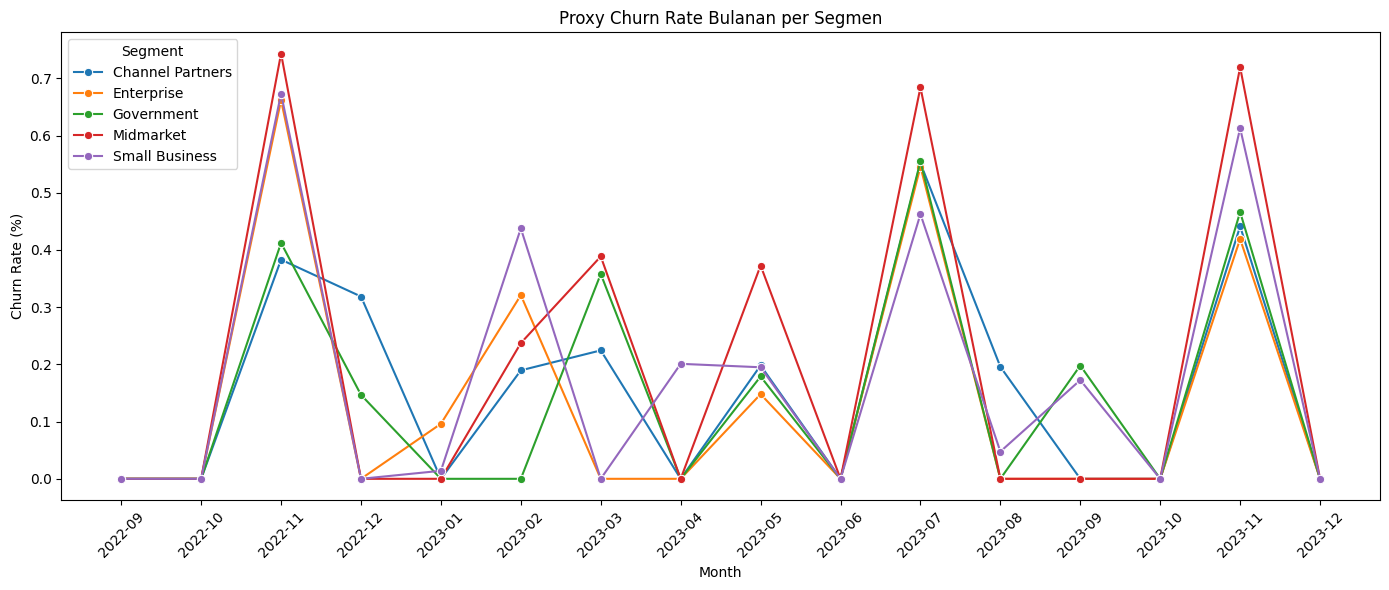

In [262]:
import pandas as pd

# Load data

df[" Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period("M").astype(str)

# Agregasi Units Sold per bulan per segmen
monthly_units = df.groupby(["Month", "Segment"])["Units Sold"].sum().reset_index()

# Hitung churn sebagai penurunan dari bulan sebelumnya
monthly_units["Prev Units"] = monthly_units.groupby("Segment")["Units Sold"].shift(1)
monthly_units["Churn Rate"] = (monthly_units["Prev Units"] - monthly_units["Units Sold"]) / monthly_units["Prev Units"]
monthly_units["Churn Rate"] = monthly_units["Churn Rate"].fillna(0).clip(lower=0)  # hanya penurunan dianggap churn

print(monthly_units.head())
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_units, x="Month", y="Churn Rate", hue="Segment", marker="o")
plt.title("Proxy Churn Rate Bulanan per Segmen")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Churn Tidak Terdeteksi, Bukan Tidak Ada
Kemungkinan Utama:
Data terlalu agregat → hanya punya Units Sold per segmen, bukan per pelanggan.

Segmen aktif di semua bulan → tidak ada penurunan volume yang signifikan.

Rumus churn tidak menangkap penurunan kecil → misalnya, jika Units Sold turun 2%, tapi dibulatkan jadi 0.0.

Data hanya mencakup periode pendek  → terlalu sempit untuk melihat pola retensi atau churn musiman.

      Month           Segment  Delta Units
0   2022-09  Channel Partners          NaN
1   2022-09        Enterprise          NaN
2   2022-09        Government          NaN
3   2022-09         Midmarket          NaN
4   2022-09    Small Business          NaN
..      ...               ...          ...
75  2023-12  Channel Partners   13671.0000
76  2023-12        Enterprise   10273.0000
77  2023-12        Government   30134.0000
78  2023-12         Midmarket   23240.0000
79  2023-12    Small Business    9501.0000

[80 rows x 3 columns]


Text(0.5, 1.0, 'Penurunan Units Sold per Segmen (Proxy Churn)')

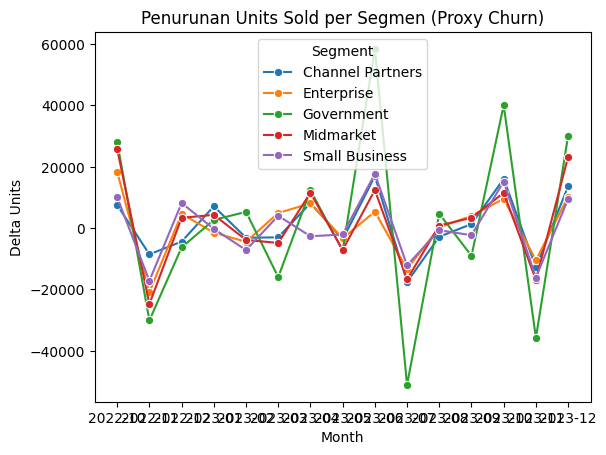

In [263]:
monthly_units["Delta Units"] = monthly_units["Units Sold"] - monthly_units["Prev Units"]
print(monthly_units[["Month", "Segment", "Delta Units"]])
pd.options.display.float_format = '{:.4f}'.format
sns.lineplot(data=monthly_units, x="Month", y="Delta Units", hue="Segment", marker="o")
plt.title("Penurunan Units Sold per Segmen (Proxy Churn)")




In [264]:
monthly_units["Status"] = monthly_units["Delta Units"].apply(lambda x: "Churn" if x < 0 else "Growth")
monthly_units["Status"]

0     Growth
1     Growth
2     Growth
3     Growth
4     Growth
       ...  
75    Growth
76    Growth
77    Growth
78    Growth
79    Growth
Name: Status, Length: 80, dtype: object

In [265]:
monthly_units["Status"].unique()

array(['Growth', 'Churn'], dtype=object)

In [266]:
pd.DataFrame(monthly_units["Status"].unique(), columns=["Status"])


,Status
0,Growth
1,Churn
